In [172]:
import pandas as pd
import os
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple, Optional, Callable
from geopy.geocoders import Nominatim
import matplotlib

In [173]:
DATA_PATH = "data"
FILE_NAME = "armslengthsales_2024_valid.csv"

In [174]:
file_path = os.path.join(DATA_PATH, FILE_NAME)

In [175]:
df = pd.read_csv(file_path)
df.shape

(1417, 20)

In [176]:
df.head()

,PropertyID,PropType,taxkey,Address,CondoProject,District,nbhd,Style,Extwall,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
0,98423,Commercial,10021000,9300 N 124TH ST,NaN,9,6202,Warehouse Building - 1 Story,Metal Siding,1.0,2002.0,NaN,5834.0,1,NaN,0,0,392040,2024-01-24,500000.0
1,98576,Residential,50057000,9311 N 85TH ST,NaN,9,40,Split Level,Aluminum/Vinyl,1.0,1985.0,6.0,1668.0,1,3.0,1,1,12900,2024-03-08,250000.0
2,98722,Condominium,70043000,"9232 N 70TH ST, Unit 7",NORTHRIDGE WOOD LAKE,9,5010,Condo Townhouse,NaN,2.0,1973.0,7.0,1437.0,1,4.0,2,1,0,2024-01-10,120000.0
3,98901,Condominium,310286000,9103 N 70TH ST,NORTHRIDGE EASTBAY,9,5020,Condo Townhouse,NaN,2.0,1973.0,5.0,1295.0,1,2.0,1,1,1,2024-02-09,124000.0
4,99216,Residential,330127000,9115 N 86TH ST,NaN,9,40,Ranch,Aluminum/Vinyl,1.0,1978.0,6.0,1467.0,1,3.0,1,1,7808,2024-05-17,305000.0


In [177]:
df.isna().sum()

PropertyID         0
PropType           0
taxkey             0
Address            0
CondoProject    1247
District           0
nbhd               0
Style              6
Extwall          181
Stories            5
Year_Built         2
Rooms             70
FinishedSqft       6
Units              0
Bdrms             70
Fbath              0
Hbath              0
Lotsize            0
Sale_date          0
Sale_price         0
dtype: int64

In [178]:
df.describe()

,PropertyID,taxkey,District,nbhd,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_price
count,1417.000000,1.417000e+03,1417.000000,1417.000000,1412.000000,1415.000000,1347.000000,1411.000000,1417.000000,1347.000000,1417.000000,1417.000000,1417.000000,1.417000e+03
mean,173718.090332,3.315496e+09,7.630205,3178.191955,1.401912,1932.996466,7.074239,1831.130404,1.541284,3.512992,1.506704,0.275229,5889.395201,2.381025e+05
std,46115.051525,1.409884e+09,4.218957,1941.702803,0.458145,118.574916,3.358538,2315.073353,3.435014,1.638713,0.718100,0.494790,12085.632671,2.567695e+05
min,98423.000000,1.002100e+07,1.000000,40.000000,0.000000,0.000000,0.000000,460.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+04
25%,134568.000000,2.299786e+09,5.000000,1680.000000,1.000000,1920.000000,5.000000,1080.000000,1.000000,3.000000,1.000000,0.000000,3750.000000,1.370000e+05
50%,167808.000000,3.080497e+09,7.000000,2860.000000,1.500000,1945.000000,6.000000,1404.000000,1.000000,3.000000,1.000000,0.000000,5000.000000,2.030000e+05
75%,209985.000000,4.320247e+09,11.000000,4520.000000,2.000000,1957.000000,9.000000,1997.000000,2.000000,4.000000,2.000000,1.000000,6450.000000,2.670000e+05
max,266284.000000,6.909944e+09,15.000000,32906.000000,4.000000,2023.000000,32.000000,47244.000000,109.000000,17.000000,5.000000,3.000000,392040.000000,5.650000e+06


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1417 entries, 0 to 1416
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PropertyID    1417 non-null   int64  
 1   PropType      1417 non-null   object 
 2   taxkey        1417 non-null   int64  
 3   Address       1417 non-null   object 
 4   CondoProject  170 non-null    object 
 5   District      1417 non-null   int64  
 6   nbhd          1417 non-null   int64  
 7   Style         1411 non-null   object 
 8   Extwall       1236 non-null   object 
 9   Stories       1412 non-null   float64
 10  Year_Built    1415 non-null   float64
 11  Rooms         1347 non-null   float64
 12  FinishedSqft  1411 non-null   float64
 13  Units         1417 non-null   int64  
 14  Bdrms         1347 non-null   float64
 15  Fbath         1417 non-null   int64  
 16  Hbath         1417 non-null   int64  
 17  Lotsize       1417 non-null   int64  
 18  Sale_date     1417 non-null 

In [180]:
df.nunique()

PropertyID      1409
PropType           5
taxkey          1409
Address         1409
CondoProject      84
District          15
nbhd             264
Style             53
Extwall           15
Stories            7
Year_Built       132
Rooms             23
FinishedSqft     962
Units             16
Bdrms             17
Fbath              6
Hbath              4
Lotsize          514
Sale_date        130
Sale_price       530
dtype: int64

In [181]:
round(df.nunique() / len(df), 2)

PropertyID      0.99
PropType        0.00
taxkey          0.99
Address         0.99
CondoProject    0.06
District        0.01
nbhd            0.19
Style           0.04
Extwall         0.01
Stories         0.00
Year_Built      0.09
Rooms           0.02
FinishedSqft    0.68
Units           0.01
Bdrms           0.01
Fbath           0.00
Hbath           0.00
Lotsize         0.36
Sale_date       0.09
Sale_price      0.37
dtype: float64

<Axes: >

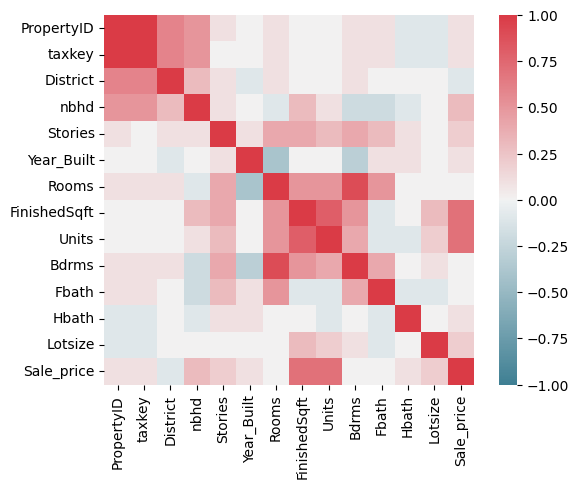

In [182]:
df_corr = df.select_dtypes(include=np.number).corr().round(1)
sns.heatmap(
    data=df_corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    xticklabels=df_corr.columns.values,
    yticklabels=df_corr.columns.values,
    vmin=-1,
    vmax=1,
    square=True,
)

In [183]:
MAX_SHOWED_DATAPOINTS = 10
UNIQUE_RATIO_THRESHOLD = 0.95

for column in df.columns:
    col_series = df[column].dropna()

    unique_values = col_series.unique()

    if (
        unique_values_ratio := len(unique_values) / len(col_series)
    ) > UNIQUE_RATIO_THRESHOLD:
        print(
            f"{column}: seems like a non categorigal column. Unique values ratio {len(unique_values)}/{len(col_series)} = {unique_values_ratio*100 :.2f}%"
        )
    else:
        no_showed_points = min(MAX_SHOWED_DATAPOINTS, len(unique_values))
        selected_values = np.random.choice(
            unique_values, no_showed_points, replace=False
        )

        if np.issubdtype(selected_values.dtype, np.number):
            selected_values = np.sort(selected_values)

        print(
            f"{column}: has the following unique values ({no_showed_points}/{len(unique_values)}):"
        )
        print(selected_values)

    print("\n-----------\n")

PropertyID: seems like a non categorigal column. Unique values ratio 1409/1417 = 99.44%

-----------

PropType: has the following unique values (5/5):
['Condominium' 'Residential' 'Lg Apartment' 'Commercial' 'Exempt']

-----------

taxkey: seems like a non categorigal column. Unique values ratio 1409/1417 = 99.44%

-----------

Address: seems like a non categorigal column. Unique values ratio 1409/1417 = 99.44%

-----------

CondoProject: has the following unique values (10/84):
['SPRING TERRACE NORTH' 'MCCORMICK ON FARWELL' 'CHATEAU'
 'HI-FI LOFTS CONDOMINIUMS' 'HEATHERS' 'STERLING CONDOMINIUM'
 'CLOISTERS NW' 'WATERS EDGE' 'VILLA DU COURS (ELEVATOR)'
 'RIVERCREST CONDOMINIUM']

-----------

District: has the following unique values (10/15):
[ 1  3  5  6  8  9 10 11 12 13]

-----------

nbhd: has the following unique values (10/264):
[ 820 1440 2910 4420 4430 5065 5390 5800 6417 6432]

-----------

Style: has the following unique values (10/53):
['Condo Townhouse' 'AP3 (Conventional A

In [184]:
def basis_statistical_values(data: pd.DataFrame, key: str) -> None:
    print("NA values:", df[key].isna().sum())
    print(f'Unique percentage: {len(df["taxkey"].unique())/len(df)  :.2f}')
    print(f"Unique absolute: {len(df[key].unique())}")


def groupby_threshold(
    df: pd.DataFrame, label_name: str, threshold: int
) -> pd.DataFrame:
    label_counts = df[label_name].value_counts()
    df[label_name] = df[label_name].apply(
        lambda val: "RARE" if val and label_counts[val] < threshold else val
    )
    return df.groupby(label_name)


def kde_ext_mean_sdev(ax: matplotlib.axes.Axes, data: pd.Series):
    middle = data.mean()
    sdev = data.std()
    left = middle - sdev
    right = middle + sdev
    return kde_add_ax(left, middle, right, ax, vline_label="mean", body_label="sdev")


def kde_ext_median_quantiles(ax: matplotlib.axes.Axes, data: pd.Series):
    left, middle, right = np.percentile(data, [25, 50, 75])
    return kde_add_ax(
        left, middle, right, ax, vline_label="median", body_label="quantile 25 - 75"
    )


def kde_add_ax(left, middle, right, ax, vline_label, body_label):
    kdeline = ax.lines[0]
    xs = kdeline.get_xdata()
    ys = kdeline.get_ydata()

    ax.vlines(middle, 0, np.interp(middle, xs, ys), ls=":", label=vline_label)
    ax.fill_between(xs, 0, ys, alpha=0.2)
    ax.fill_between(
        xs,
        0,
        ys,
        where=(left <= xs) & (xs <= right),
        interpolate=True,
        alpha=0.2,
        label=body_label,
    )

    return ax


def kde_plot(
    df: pd.DataFrame,
    attribute: str,
    title: str,
    kde_ext: Optional[Callable[matplotlib.axes.Axes, pd.Series]] = None,
    **kde_args,
):
    x = df[attribute]
    ax = sns.kdeplot(x, fill=False, **kde_args)
    if kde_ext:
        ax = kde_ext(ax, x)

    ax.set_title(title)
    plt.legend()
    plt.show()

## Property ID

Die PropertyID identifiziert ein Objekt eindeutig. Eine genauere Analyse der PropertyID zeigt, dass sich die PropertyID nicht als eindeutiger Identifyer für jeden verkaufen Eintrag. Anhand dessen liese sich die Wertentwicklung über die Zeit messen. Die erste explorative Analyse zeigt, dass jedes der verkaufen Objekte eine eindeutige ID besitzt. Einige wurden im Jahr 2024 mehrfach verkauft.

In [185]:
basis_statistical_values(df, "PropertyID")

NA values: 0
Unique percentage: 0.99
Unique absolute: 1409


In [186]:
duplicated_prop_id = df[df["PropertyID"].duplicated()]
duplicated_prop_id

,PropertyID,PropType,taxkey,Address,CondoProject,District,nbhd,Style,Extwall,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
325,132147,Residential,2260902000,4414 N 65TH ST,NaN,2,1490,Ranch,Aluminum/Vinyl,1.0,1952.0,4.0,761.0,1,2.0,1,0,5460,2024-05-31,225000.0
395,138523,Residential,2470819000,4219 N 38TH ST,NaN,7,1680,Cape Cod,Wood,1.5,1950.0,10.0,1336.0,1,6.0,2,1,10777,2024-05-14,225000.0
398,138724,Residential,2471451000,4326 N 37TH ST,NaN,7,1680,Res O/S 2sty +,Aluminum/Vinyl,2.0,1923.0,7.0,1799.0,1,3.0,1,1,16256,2024-03-20,170000.0
401,138835,Residential,2479892000,4306 N 41ST ST,NaN,7,1680,Cape Cod,Aluminum/Vinyl,1.5,1945.0,6.0,1562.0,1,2.0,1,1,5120,2024-05-08,198000.0
480,144999,Residential,2640903000,3776 N 73RD ST,NaN,10,1940,Cape Cod,Aluminum/Vinyl,1.0,1952.0,6.0,1554.0,1,3.0,2,0,5610,2024-05-29,185000.0
692,166393,Residential,3061625000,5958 W APPLETON AV,NaN,10,1860,Res O/S 1 Story,Stucco,1.0,1920.0,5.0,908.0,1,2.0,1,0,4200,2024-06-14,119630.0
1230,233967,Residential,5250303113,3133 S 97TH ST,NaN,11,4350,Ranch,Aluminum/Vinyl,1.0,1959.0,5.0,1177.0,1,3.0,1,1,4800,2024-05-29,320000.0
1297,243582,Residential,5460384000,3717 S ALABAMA AV,NaN,14,4620,Cape Cod,Block,1.5,1952.0,7.0,1744.0,1,4.0,2,0,7200,2024-03-05,400000.0


In [187]:
df[df["PropertyID"].isin(duplicated_prop_id["PropertyID"])]

,PropertyID,PropType,taxkey,Address,CondoProject,District,nbhd,Style,Extwall,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
324,132147,Residential,2260902000,4414 N 65TH ST,NaN,2,1490,Ranch,Aluminum/Vinyl,1.0,1952.0,4.0,761.0,1,2.0,1,0,5460,2024-02-27,105000.0
325,132147,Residential,2260902000,4414 N 65TH ST,NaN,2,1490,Ranch,Aluminum/Vinyl,1.0,1952.0,4.0,761.0,1,2.0,1,0,5460,2024-05-31,225000.0
394,138523,Residential,2470819000,4219 N 38TH ST,NaN,7,1680,Cape Cod,Wood,1.5,1950.0,10.0,1336.0,1,6.0,2,1,10777,2024-01-30,86000.0
395,138523,Residential,2470819000,4219 N 38TH ST,NaN,7,1680,Cape Cod,Wood,1.5,1950.0,10.0,1336.0,1,6.0,2,1,10777,2024-05-14,225000.0
397,138724,Residential,2471451000,4326 N 37TH ST,NaN,7,1680,Res O/S 2sty +,Aluminum/Vinyl,2.0,1923.0,7.0,1799.0,1,3.0,1,1,16256,2024-03-01,170000.0
398,138724,Residential,2471451000,4326 N 37TH ST,NaN,7,1680,Res O/S 2sty +,Aluminum/Vinyl,2.0,1923.0,7.0,1799.0,1,3.0,1,1,16256,2024-03-20,170000.0
400,138835,Residential,2479892000,4306 N 41ST ST,NaN,7,1680,Cape Cod,Aluminum/Vinyl,1.5,1945.0,6.0,1562.0,1,2.0,1,1,5120,2024-01-04,97900.0
401,138835,Residential,2479892000,4306 N 41ST ST,NaN,7,1680,Cape Cod,Aluminum/Vinyl,1.5,1945.0,6.0,1562.0,1,2.0,1,1,5120,2024-05-08,198000.0
479,144999,Residential,2640903000,3776 N 73RD ST,NaN,10,1940,Cape Cod,Aluminum/Vinyl,1.0,1952.0,6.0,1554.0,1,3.0,2,0,5610,2024-02-20,130000.0
480,144999,Residential,2640903000,3776 N 73RD ST,NaN,10,1940,Cape Cod,Aluminum/Vinyl,1.0,1952.0,6.0,1554.0,1,3.0,2,0,5610,2024-05-29,185000.0


## PropType

Das Attribut PropType beschreibt den Typ des jeweiligen Objektes. Es gibt insgesamt 5 verschiedene Objektarten.

In [188]:
basis_statistical_values(df, "PropType")

NA values: 0
Unique percentage: 0.99
Unique absolute: 5


In [189]:
df["PropType"].unique()

array(['Commercial', 'Residential', 'Condominium', 'Exempt',
       'Lg Apartment'], dtype=object)

In [190]:
df_grouped_prop_type = df.groupby(by="PropType").count()
px.pie(
    data_frame=df_grouped_prop_type,
    values="PropertyID",
    names=df_grouped_prop_type.index,
    height=700,
)

## Taxkey

Das Attribut Taxkey is eine eindeutige Steuernummer, die einem Objekt zugeordnet ist. Interessanterweise korreliert der Taxkey nahezu 100% mit dem Attribut PropertyID.

In [191]:
basis_statistical_values(df, "taxkey")

NA values: 0
Unique percentage: 0.99
Unique absolute: 1409


In [192]:
duplicated_taxkey = df[df["taxkey"].duplicated()]
duplicated_taxkey.head(5)

,PropertyID,PropType,taxkey,Address,CondoProject,District,nbhd,Style,Extwall,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
325,132147,Residential,2260902000,4414 N 65TH ST,NaN,2,1490,Ranch,Aluminum/Vinyl,1.0,1952.0,4.0,761.0,1,2.0,1,0,5460,2024-05-31,225000.0
395,138523,Residential,2470819000,4219 N 38TH ST,NaN,7,1680,Cape Cod,Wood,1.5,1950.0,10.0,1336.0,1,6.0,2,1,10777,2024-05-14,225000.0
398,138724,Residential,2471451000,4326 N 37TH ST,NaN,7,1680,Res O/S 2sty +,Aluminum/Vinyl,2.0,1923.0,7.0,1799.0,1,3.0,1,1,16256,2024-03-20,170000.0
401,138835,Residential,2479892000,4306 N 41ST ST,NaN,7,1680,Cape Cod,Aluminum/Vinyl,1.5,1945.0,6.0,1562.0,1,2.0,1,1,5120,2024-05-08,198000.0
480,144999,Residential,2640903000,3776 N 73RD ST,NaN,10,1940,Cape Cod,Aluminum/Vinyl,1.0,1952.0,6.0,1554.0,1,3.0,2,0,5610,2024-05-29,185000.0


In [193]:
df[df["taxkey"].isin(duplicated_prop_id["taxkey"])].head(5)

,PropertyID,PropType,taxkey,Address,CondoProject,District,nbhd,Style,Extwall,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
324,132147,Residential,2260902000,4414 N 65TH ST,NaN,2,1490,Ranch,Aluminum/Vinyl,1.0,1952.0,4.0,761.0,1,2.0,1,0,5460,2024-02-27,105000.0
325,132147,Residential,2260902000,4414 N 65TH ST,NaN,2,1490,Ranch,Aluminum/Vinyl,1.0,1952.0,4.0,761.0,1,2.0,1,0,5460,2024-05-31,225000.0
394,138523,Residential,2470819000,4219 N 38TH ST,NaN,7,1680,Cape Cod,Wood,1.5,1950.0,10.0,1336.0,1,6.0,2,1,10777,2024-01-30,86000.0
395,138523,Residential,2470819000,4219 N 38TH ST,NaN,7,1680,Cape Cod,Wood,1.5,1950.0,10.0,1336.0,1,6.0,2,1,10777,2024-05-14,225000.0
397,138724,Residential,2471451000,4326 N 37TH ST,NaN,7,1680,Res O/S 2sty +,Aluminum/Vinyl,2.0,1923.0,7.0,1799.0,1,3.0,1,1,16256,2024-03-01,170000.0


In [194]:
duplicated_taxkey.select_dtypes(include=np.number).corr()["PropertyID"]["taxkey"]

np.float64(0.9983724443997694)

## Address

In [195]:
def create_geopy_converter() -> Nominatim:
    return Nominatim(user_agent="Geopy Library")


def us_addr_lat_long_converter(
    addr: str, converter: Optional[Nominatim] = None
) -> Tuple[str, str]:
    print("convert addr:", addr)
    if not converter:
        converter = create_geopy_converter()
    try:
        location = converter.geocode(addr)
        print(f"Lat long for addr {addr} is {location.latitude}, {location.longitude}")
        return location.latitude, location.longitude
    except Exception as e:
        print(f"Can't convert Address: {addr} because {e}")
        return None, None

In [196]:
basis_statistical_values(df, "Address")

NA values: 0
Unique percentage: 0.99
Unique absolute: 1409


In [197]:
LATLON_FILEPATH = os.path.join(DATA_PATH, "latlon_" + FILE_NAME)

In [198]:
if os.path.exists(LATLON_FILEPATH):
    df = pd.read_parquet(LATLON_FILEPATH)
else:
    converter = create_geopy_converter()
    lat_long = df["Address"].apply(
        lambda addr: us_addr_lat_long_converter(addr, converter)
    )
    lat, long = zip(*lat_long)
    df["lat"] = lat
    df["long"] = long
    df.to_parquet(LATLON_FILEPATH)
df

,PropertyID,PropType,taxkey,Address,CondoProject,District,nbhd,Style,Extwall,Stories,...,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price,lat,long
0,98423,Commercial,10021000,9300 N 124TH ST,None,9,6202,Warehouse Building - 1 Story,Metal Siding,1.0,...,5834.0,1,NaN,0,0,392040,2024-01-24,500000.0,43.186605,-88.062724
1,98576,Residential,50057000,9311 N 85TH ST,None,9,40,Split Level,Aluminum/Vinyl,1.0,...,1668.0,1,3.0,1,1,12900,2024-03-08,250000.0,43.186697,-88.016081
2,98722,Condominium,70043000,"9232 N 70TH ST, Unit 7",NORTHRIDGE WOOD LAKE,9,5010,Condo Townhouse,None,2.0,...,1437.0,1,4.0,2,1,0,2024-01-10,120000.0,40.268082,-76.767213
3,98901,Condominium,310286000,9103 N 70TH ST,NORTHRIDGE EASTBAY,9,5020,Condo Townhouse,None,2.0,...,1295.0,1,2.0,1,1,1,2024-02-09,124000.0,43.183954,-87.998814
4,99216,Residential,330127000,9115 N 86TH ST,None,9,40,Ranch,Aluminum/Vinyl,1.0,...,1467.0,1,3.0,1,1,7808,2024-05-17,305000.0,43.183552,-88.017922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412,259692,Residential,6890106000,6016 S 19TH ST,None,13,4860,Ranch,Brick,1.0,...,1621.0,1,3.0,2,1,11520,2024-03-05,328000.0,42.935870,-87.937751
1413,260094,Residential,6900822000,2217 W BRIDGE ST,None,13,4860,Ranch,Aluminum/Vinyl,1.0,...,1544.0,1,6.0,1,1,7440,2024-03-05,336000.0,42.934667,-87.942501
1414,260191,Residential,6909902000,2135 W MANGOLD AV,None,13,4860,Cottage,Aluminum/Vinyl,1.0,...,1349.0,1,4.0,1,0,19680,2024-02-29,205000.0,42.932268,-87.941911
1415,260207,Residential,6909918000,2240 W MANGOLD AV,None,13,4860,Res O/S A & 1/2,Aluminum/Vinyl,1.5,...,1402.0,1,3.0,1,0,16320,2024-03-22,267000.0,42.932854,-87.943187


In [199]:
# Beispiel: Ersetze NaN-Werte in FinishedSqft und Year_Built durch Standardwerte
df["FinishedSqft"] = df["FinishedSqft"].fillna(0)
df["Year_Built"] = df["Year_Built"].fillna(
    df["Year_Built"].mean()
)  # z.B. mit dem Durchschnittswert

# Alternativ kannst du NaN-Werte aus beiden Spalten entfernen
# df = df.dropna(subset=['FinishedSqft', 'Year_Built'])

# Erstelle die Scatter Mapbox Karte
fig = px.scatter_mapbox(
    df,
    lat="lat",
    lon="long",
    size="FinishedSqft",  # Größe der Kreise basierend auf der Quadratmeterzahl
    color="Sale_price",  # Farbe basierend auf dem Verkaufspreis
    hover_name="PropertyID",
    hover_data={
        "Address": True,
        "Sale_price": ":$.2f",
        "Year_Built": True,
        "Rooms": True,
        "FinishedSqft": True,
        "nbhd": True,
    },
    mapbox_style="carto-positron",
    height=1800,
    color_continuous_scale=px.colors.diverging.Tealrose,
    size_max=20,
    opacity=df["Year_Built"]
    / df["Year_Built"].max(),  # Skaliert die Deckkraft basierend auf dem Baujahr
    # animation_frame="Sale_date"
)

# Zeige die Karte an
fig.show()

## CondoProject

Nur ein Bruchteil der Datensätze sind einem CondoProject zugeordnet. Desweiteren gibt es sehr viele verschiedene Ausprägungen des Attributs auf wenig Werte. Für die spätere Featureentwicklung würde sich ein boolscher Wert anbieten, der klassifiziert ob ein Objekt ein Condo Projekt ist oder nicht.

In [200]:
basis_statistical_values(df, "CondoProject")

NA values: 1247
Unique percentage: 0.99
Unique absolute: 85


In [201]:
df_condo_project = (
    df.dropna(subset=["CondoProject"]).groupby("CondoProject").count()["PropertyID"]
)
df_condo_project

CondoProject
1522 ON THE LAKE CONDOMINIUMS     4
224 W VINE STREET CONDOMINIUMS    1
ARBOR RIDGE                       3
BAYVIEW GARDENS                   1
BAYVIEW TERRACE                   1
                                 ..
WILLOW CREEK                      2
WILSON PARK MANOR                 1
WISCONSIN TOWER                   3
WOODLANDS                         8
WOODSTOCK CONDOMINIUM             1
Name: PropertyID, Length: 84, dtype: int64

In [202]:
px.bar(df_condo_project.sort_values(ascending=False), y="PropertyID")

In [203]:
df["is_condo_project"] = df["CondoProject"].isna() == False

In [204]:
df.columns

Index(['PropertyID', 'PropType', 'taxkey', 'Address', 'CondoProject',
       'District', 'nbhd', 'Style', 'Extwall', 'Stories', 'Year_Built',
       'Rooms', 'FinishedSqft', 'Units', 'Bdrms', 'Fbath', 'Hbath', 'Lotsize',
       'Sale_date', 'Sale_price', 'lat', 'long', 'is_condo_project'],
      dtype='object')

In [205]:
df_is_condo_project_grouped = df.groupby("is_condo_project").count()
px.pie(
    df_is_condo_project_grouped,
    values="PropertyID",
    names=["Kein Condo Projekt", "Condo Projekt"],
)

## District

In [206]:
basis_statistical_values(df, "District")

NA values: 0
Unique percentage: 0.99
Unique absolute: 15


In [207]:
df["District"].unique()

array([ 9,  1,  5,  2,  7, 10,  6,  3, 15,  4, 12,  8, 14, 11, 13])

In [208]:
df_district = df.groupby("District").count()

In [209]:
px.pie(df_district, names=df_district.index, values="PropertyID")

## Neighbourhood

In [210]:
basis_statistical_values(df, "nbhd")

NA values: 0
Unique percentage: 0.99
Unique absolute: 264


In [211]:
df["nbhd"].unique()

array([ 6202,    40,  5010,  5020,  5049,  5060,   240,  5065,  5070,
        5069,  5081,  5090,  5091,   440,  5103,  5120,  5110,  5111,
        5125,  5124,   360,   380,  6216,   820,   480,   520,   600,
         560,   660,  5140,  5170,   780,    50,   700,   900,   960,
         980,  1020,  6432,  6475,  5180,  1040,  1400,  5200,  1380,
        6218,  1140,  1160,  1200,  1220,  1340,  1440,  1150,  1480,
       21230,  6226,  6611,  1460,  1470,  6418,  1490,  1560,  6230,
        1500,  1620,  6234,  1680,  6650,  5210,  2100,  2040,  5220,
        1940,  6673,  1830,  1820,  1840,  1740,  2840,  2960,  2860,
        6240,  2820,  3160,  3060,  3320,  3150,  5445,  2880,  2900,
        5720,  2850,  6701,  2950,  1780,  6671,  6242,  2500,  1850,
        6670,  2120,  2140,  2080,  1870,  1980,  1860,  2510,  2870,
        2930,  2890,  6770,  5405,  3170,  5572,  5611,  3190,  3330,
        6760,  2920,  2940,  2420,  2400,  2380,  2520,  6250,  1890,
       32906,  6663,

## Style

In [212]:
basis_statistical_values(df, "Style")

NA values: 6
Unique percentage: 0.99
Unique absolute: 54


In [213]:
df["Style"].unique()

array(['Warehouse Building - 1 Story', 'Split Level', 'Condo Townhouse',
       'Ranch', 'Low Rise 1-3 Stories', 'Townhouse', None, 'Colonial',
       'Auto Repair', 'Milwaukee Bungalow', 'Cape Cod', 'Duplex O/S',
       'Duplex N/S', 'Day Care Center', 'Res O/S A & 1/2',
       'Res O/S 2sty +', 'Cottage', 'Triplex', 'Bi-Level', 'Car Wash',
       'Hotel - Limited Service', 'Super Market', 'Dplx Bungalow',
       'Religious Institution', 'Office Building - 1 Story',
       'AP1 (Conventional Apt with 4-6 Units)', 'Service Building',
       'Svc Station w Conv and Restaurant', 'Laundromat', 'Tavern',
       'School', 'Store Building - Single tenant, 1 story',
       'Store Building - Multiple Tenants, 1 story', 'Mansion',
       'Mid Rise 4-12 Stories',
       'R/M (Res. Multiple) or Rooming House - commercial',
       'Store Bldg - Multi Story (Store & Apt, Store & Ofc', 'Tudor',
       'Res O/S 1 Story', 'Condo Duplex', 'Duplex-Cottage',
       'High Rise > 12 Stories', 'Townhouse Ap

In [214]:
df["Style"].isna().sum()

np.int64(6)

In [215]:
df_style = df.copy()
style_counts = df_style["Style"].value_counts()
df_style["Style"] = df_style["Style"].apply(
    lambda style: "RARE" if style and style_counts[style] < 20 else style
)
df_style = df_style.groupby("Style").count()

In [216]:
px.pie(names=df_style.index, values=df_style["PropertyID"])

## Extwall

In [217]:
basis_statistical_values(df, "Extwall")

NA values: 181
Unique percentage: 0.99
Unique absolute: 16


In [218]:
df_extwall = groupby_threshold(df, "Extwall", 20).count()

In [219]:
px.pie(names=df_extwall.index, values=df_extwall["PropertyID"])

In [220]:
# Kopie des DataFrames
df_style = df.copy()

# Zähle die Vorkommen jeder Kategorie in der Spalte 'Style'
style_counts = df_style["Style"].value_counts()

# Setze seltene Werte auf 'RARE'
df_style.loc[
    df_style["Style"].isin(style_counts[style_counts < 20].index), "Style"
] = "RARE"

# Gruppiere nach 'Style' und zähle die Einträge
grouped_df = df_style.groupby("Style").size().reset_index(name="Count")
grouped_df

,Style,Count
0,Cape Cod,189
1,Colonial,37
2,Condo Townhouse,28
3,Cottage,36
4,Dplx Bungalow,106
5,Duplex N/S,71
6,Duplex O/S,137
7,Low Rise 1-3 Stories,61
8,Mid Rise 4-12 Stories,59
9,Milwaukee Bungalow,107


In [221]:
px.pie(data_frame=grouped_df, names="Style", values="Count")

## Stories

In [222]:
basis_statistical_values(df, "Stories")

NA values: 5
Unique percentage: 0.99
Unique absolute: 8


In [223]:
df_stories = df.copy()
df_stories = df_stories.groupby("Stories").count()

In [224]:
px.pie(names=df_stories.index, values=df_stories["PropertyID"])

## Year_Built

In [225]:
basis_statistical_values(df, "Year_Built")

NA values: 0
Unique percentage: 0.99
Unique absolute: 133


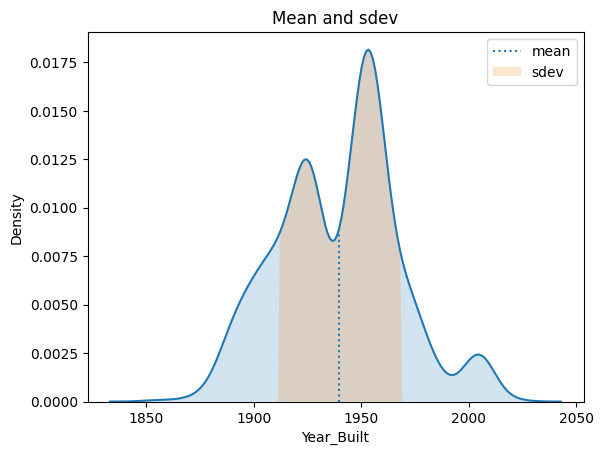

In [226]:
kde_plot(
    df[df["Year_Built"] > 1800],
    "Year_Built",
    kde_ext=kde_ext_mean_sdev,
    title="Mean and sdev",
)

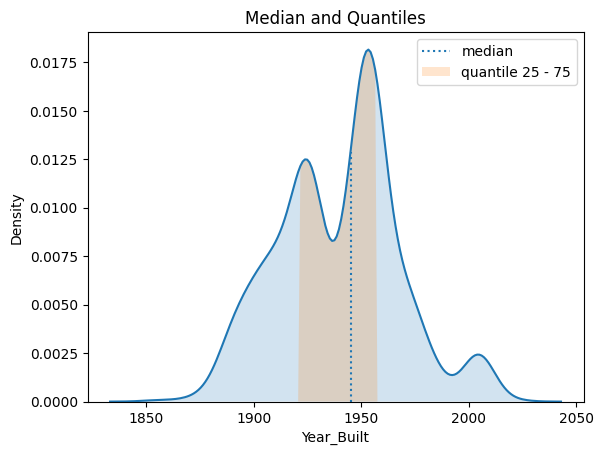

In [227]:
kde_plot(
    df[df["Year_Built"] > 1800],
    "Year_Built",
    kde_ext=kde_ext_median_quantiles,
    title="Median and Quantiles",
)

## Rooms

In [228]:
basis_statistical_values(df, "Rooms")

NA values: 70
Unique percentage: 0.99
Unique absolute: 24


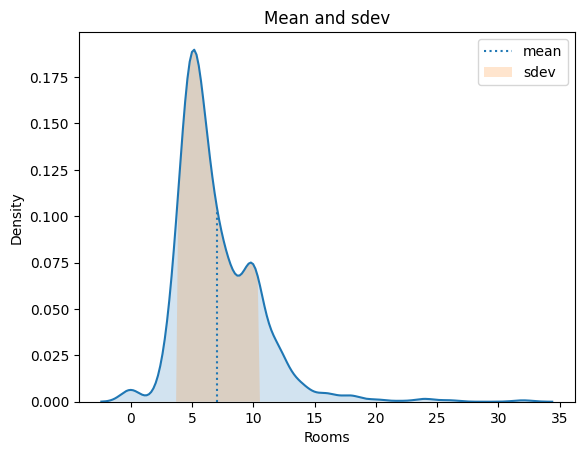

In [229]:
kde_plot(df, "Rooms", title="Mean and sdev", kde_ext=kde_ext_mean_sdev)

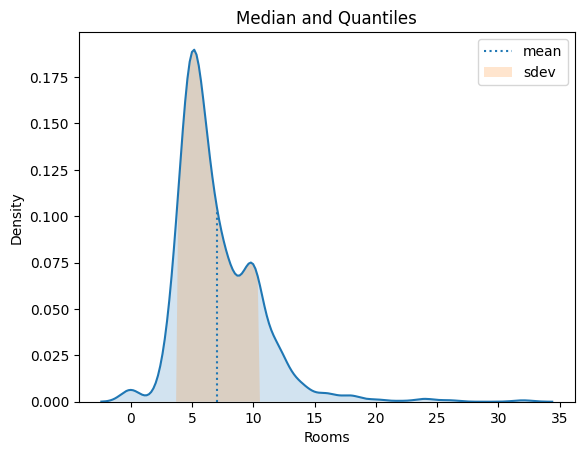

In [230]:
kde_plot(df, "Rooms", title="Median and Quantiles", kde_ext=kde_ext_mean_sdev)

## FinishedSqft

In [231]:
basis_statistical_values(df, "FinishedSqft")

NA values: 0
Unique percentage: 0.99
Unique absolute: 963


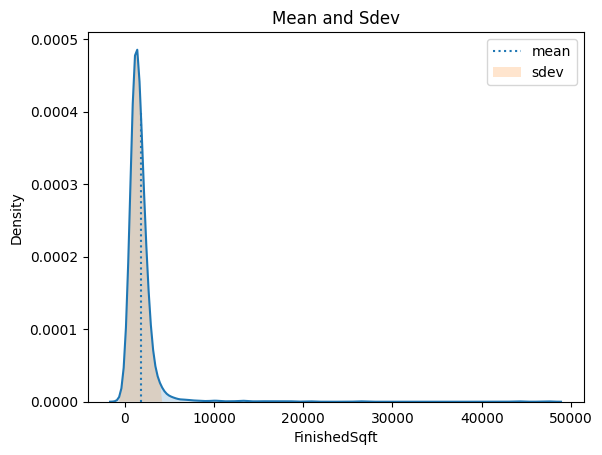

In [232]:
kde_plot(df, "FinishedSqft", "Mean and Sdev", kde_ext=kde_ext_mean_sdev)

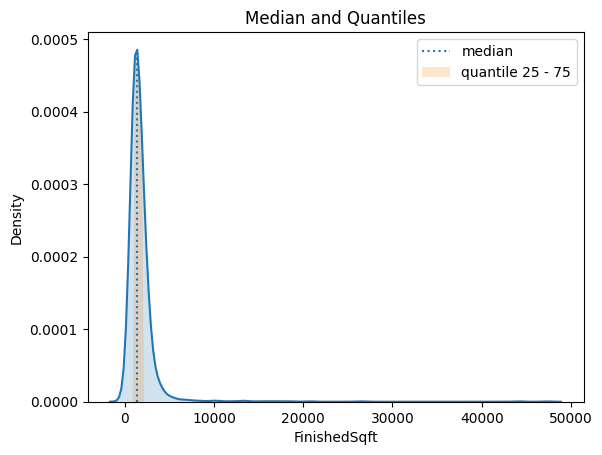

In [233]:
kde_plot(df, "FinishedSqft", "Median and Quantiles", kde_ext=kde_ext_median_quantiles)

## Units

In [234]:
basis_statistical_values(df, "Units")

NA values: 0
Unique percentage: 0.99
Unique absolute: 16


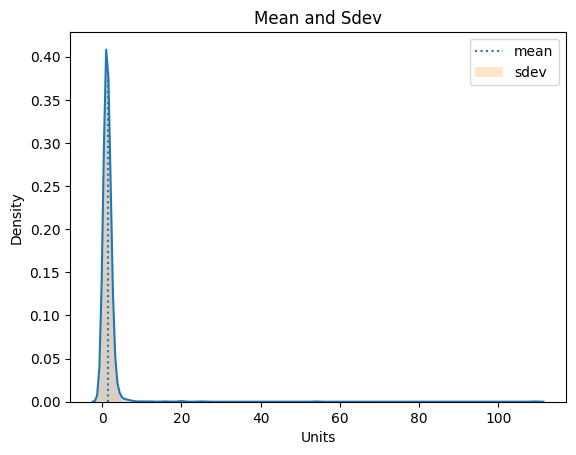

In [235]:
kde_plot(df, "Units", "Mean and Sdev", kde_ext=kde_ext_mean_sdev)

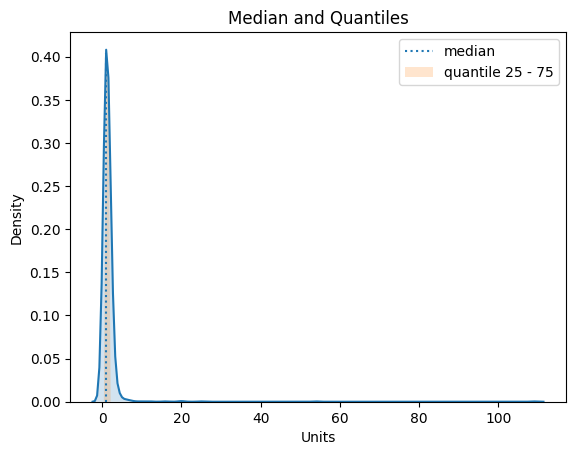

In [236]:
kde_plot(df, "Units", "Median and Quantiles", kde_ext=kde_ext_median_quantiles)

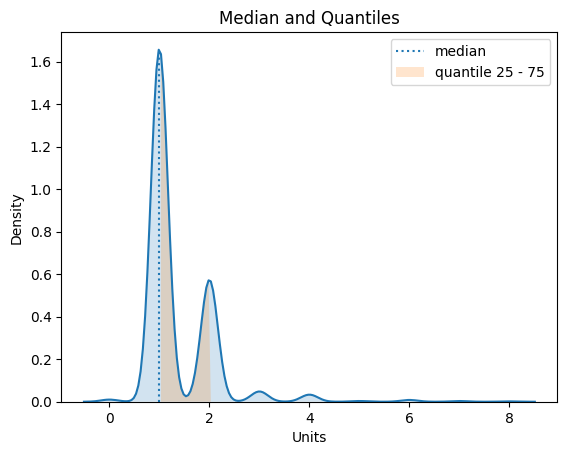

In [237]:
kde_plot(
    df[df["Units"] < 10],
    "Units",
    "Median and Quantiles",
    kde_ext=kde_ext_median_quantiles,
)

## Bdrms

In [238]:
basis_statistical_values(df, "Bdrms")

NA values: 70
Unique percentage: 0.99
Unique absolute: 18


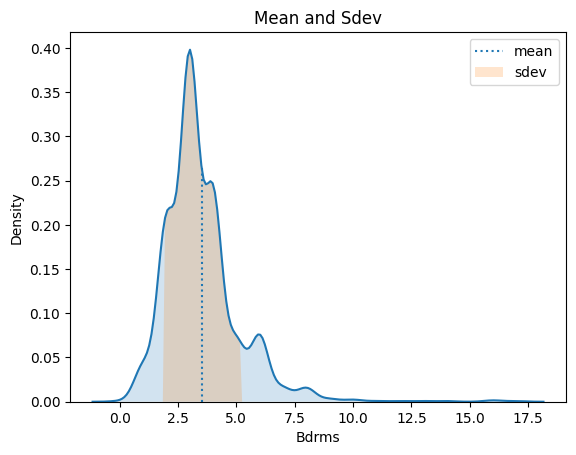

In [239]:
kde_plot(df, "Bdrms", "Mean and Sdev", kde_ext=kde_ext_mean_sdev)

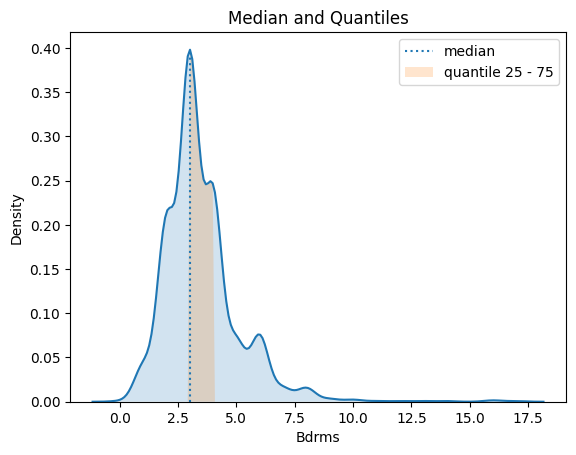

In [240]:
kde_plot(
    df.dropna(subset="Bdrms"),
    "Bdrms",
    "Median and Quantiles",
    kde_ext=kde_ext_median_quantiles,
)

## Fbath

In [241]:
basis_statistical_values(df, "Fbath")

NA values: 0
Unique percentage: 0.99
Unique absolute: 6


In [242]:
df["Fbath"].head()

0    0
1    1
2    2
3    1
4    1
Name: Fbath, dtype: int64

In [243]:
px.pie(df, names="Fbath")

In [244]:
px.scatter(df, x="Bdrms", y="Fbath", labels=("Bdrms", "Fbath"))

## Hbath

In [246]:
basis_statistical_values(df, "Hbath")

NA values: 0
Unique percentage: 0.99
Unique absolute: 4


In [248]:
px.pie(df, names="Hbath")

In [252]:
px.scatter(df, x="Hbath", y="Sale_price", labels=("Bdrms", "Fbath"))

In [253]:
df.columns

Index(['PropertyID', 'PropType', 'taxkey', 'Address', 'CondoProject',
       'District', 'nbhd', 'Style', 'Extwall', 'Stories', 'Year_Built',
       'Rooms', 'FinishedSqft', 'Units', 'Bdrms', 'Fbath', 'Hbath', 'Lotsize',
       'Sale_date', 'Sale_price', 'lat', 'long', 'is_condo_project'],
      dtype='object')

## Lotsize

In [255]:
basis_statistical_values(df, "Lotsize")

NA values: 0
Unique percentage: 0.99
Unique absolute: 514


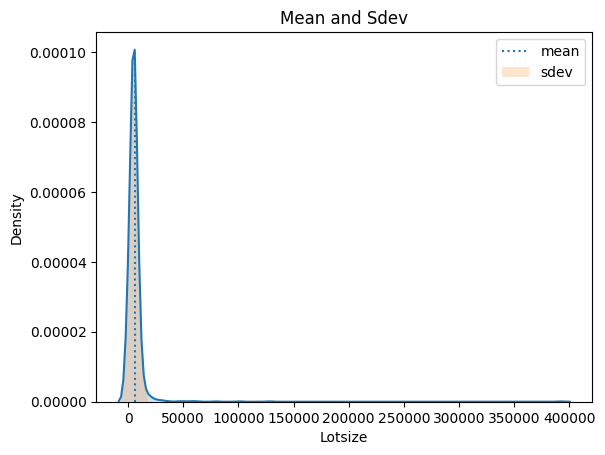

In [257]:
kde_plot(df, "Lotsize", "Mean and Sdev", kde_ext=kde_ext_mean_sdev)

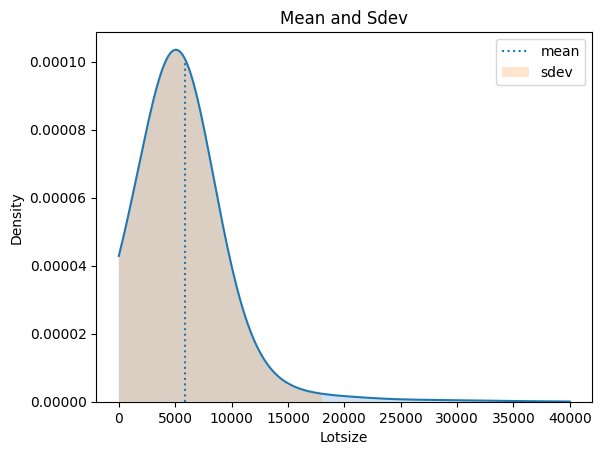

In [268]:
kde_plot(df, "Lotsize", "Mean and Sdev", kde_ext=kde_ext_mean_sdev, clip=(0, 40000))

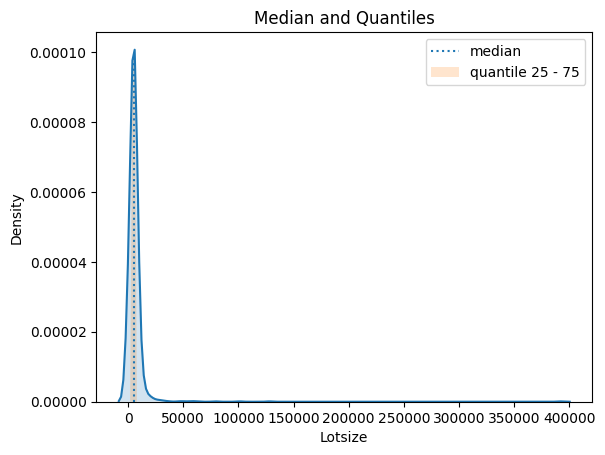

In [ ]:
kde_plot(df, "Lotsize", "Median and Quantiles", kde_ext=kde_ext_median_quantiles)

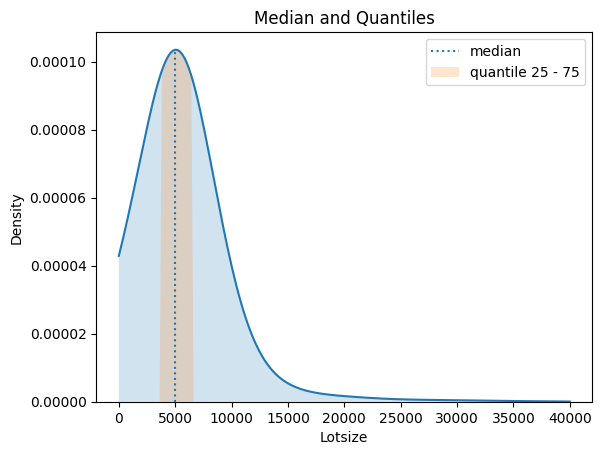

In [269]:
kde_plot(
    df,
    "Lotsize",
    "Median and Quantiles",
    kde_ext=kde_ext_median_quantiles,
    clip=(0, 40000),
)

## Sale_date

In [272]:
basis_statistical_values(df, "Sale_date")

NA values: 0
Unique percentage: 0.99
Unique absolute: 130


In [277]:
df_sale_date = df.groupby("Sale_date", as_index=False).count()

In [275]:
df_sale_date

,Sale_date,PropertyID,PropType,taxkey,Address,CondoProject,District,nbhd,Style,Extwall,...,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_price,lat,long,is_condo_project
0,2024-01-02,12,12,12,12,1,12,12,12,11,...,12,12,11,12,12,12,12,9,9,12
1,2024-01-03,8,8,8,8,0,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
2,2024-01-04,11,11,11,11,1,11,11,11,10,...,11,11,10,11,11,11,11,10,10,11
3,2024-01-05,23,23,23,23,1,23,23,23,22,...,23,23,23,23,23,23,23,21,21,23
4,2024-01-07,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2024-06-28,1,1,1,1,0,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
126,2024-07-01,1,1,1,1,0,1,1,1,1,...,1,1,0,1,1,1,1,0,0,1
127,2024-07-03,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
128,2024-07-08,2,2,2,2,1,2,2,2,1,...,2,2,1,2,2,2,2,1,1,2


In [285]:
sale_price = (
    df[["Sale_date", "Sale_price"]]
    .groupby("Sale_date", as_index=False)
    .mean()["Sale_price"]
)

In [289]:
px.scatter(df_sale_date, "Sale_date", "PropertyID", size=sale_price)